In [1]:
!pip install mediapipe

# Google Driveと接続を行います。これを行うことで、Driveにあるデータにアクセスできるようになります。
# 下記セルを実行すると、Googleアカウントのログインを求められますのでログインしてください。
from google.colab import drive
drive.mount('/content/drive')

# 作業フォルダへの移動を行います。
# もしアップロードした場所が異なる場合は作業場所を変更してください。
import os
os.chdir('/content/drive/MyDrive/ai_app_dev/2章') #ここを変更

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.6/33.6 MB 36.3 MB/s eta 0:00:00
Mounted at /content/drive


## 骨格推定AIの中身を知ろう

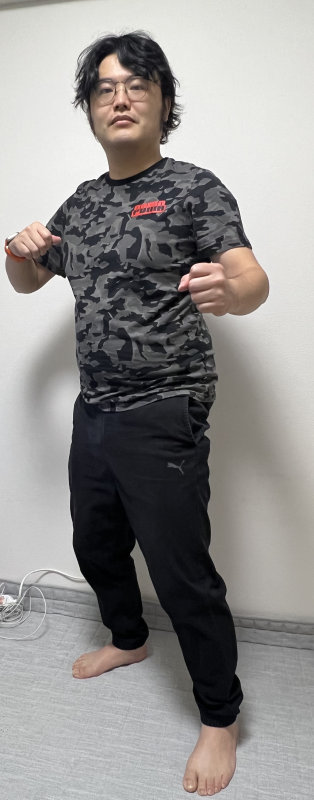

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread('data/input/img02.png')
cv2_imshow(img)

In [ ]:
img.shape

(800, 314, 3)

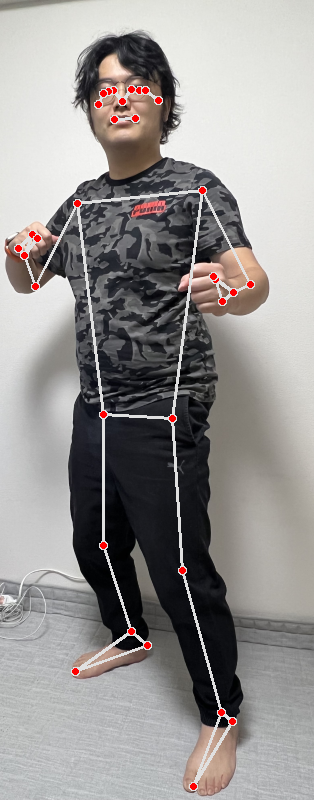

True

In [ ]:
import mediapipe as mp

mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils

pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5, model_complexity=2)
results = pose.process(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
estimation_image = img.copy()
mp_drawing.draw_landmarks(estimation_image,results.pose_landmarks,mp_pose.POSE_CONNECTIONS,)
cv2_imshow(estimation_image)

cv2.imwrite("data/output/img02_pose_estimation.png",estimation_image)

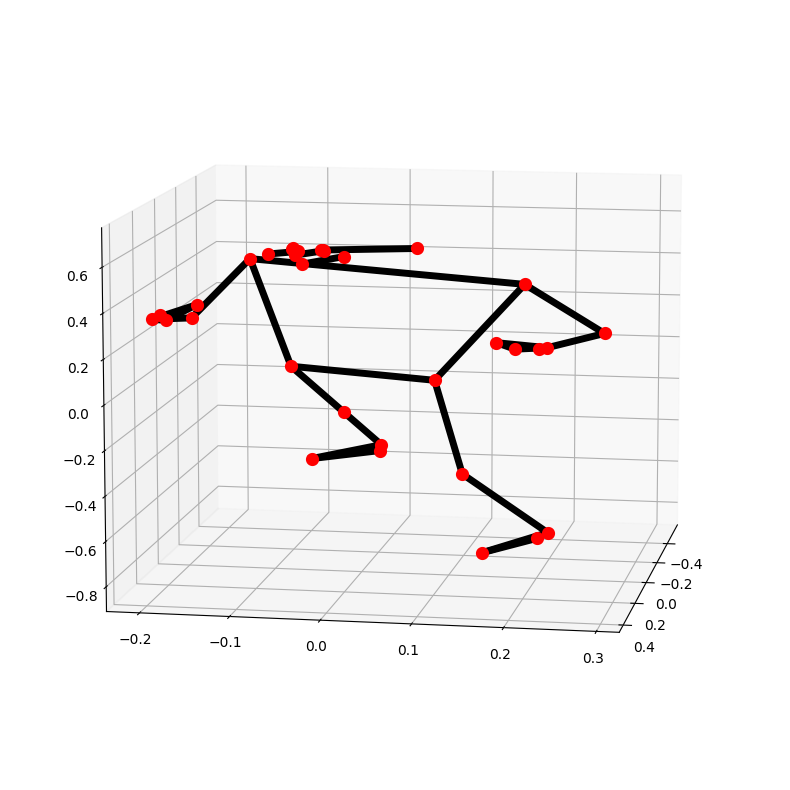

In [ ]:
mp_drawing.plot_landmarks(
  results.pose_world_landmarks,
  mp_pose.POSE_CONNECTIONS
)

In [ ]:
results.pose_landmarks.landmark[0]

x: 0.3909827172756195
y: 0.12650886178016663
z: -1.3043392896652222
visibility: 0.9999936819076538

In [ ]:
800*0.126

100.8

## 複数のデータを骨格推定してAIの予測結果を理解しよう

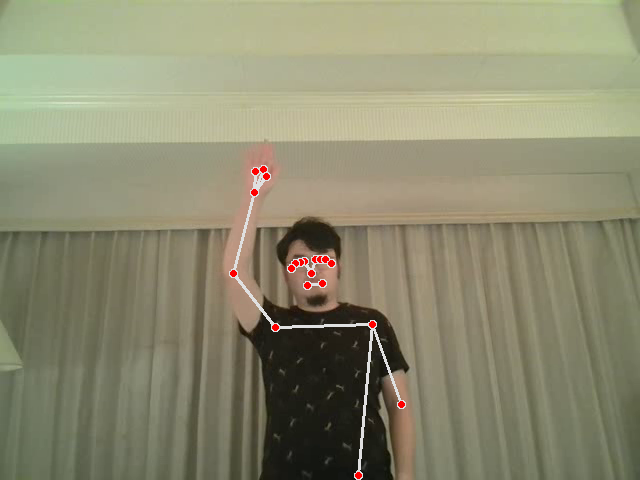

True

In [ ]:
img = cv2.imread('data/input/img03_right_up.png')
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils

pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5, model_complexity=2)
results = pose.process(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
estimation_image = img.copy()
mp_drawing.draw_landmarks(estimation_image,results.pose_landmarks,mp_pose.POSE_CONNECTIONS,)
cv2_imshow(estimation_image)

cv2.imwrite("data/output/img03_right_up_pose_estimation.png",estimation_image)

In [ ]:
print(results.pose_landmarks.landmark[20])
print(results.pose_landmarks.landmark[12])

x: 0.41212886571884155
y: 0.3526337742805481
z: -0.6578941941261292
visibility: 0.9885029196739197

x: 0.43115633726119995
y: 0.6819700002670288
z: -0.10772109031677246
visibility: 0.9979853630065918



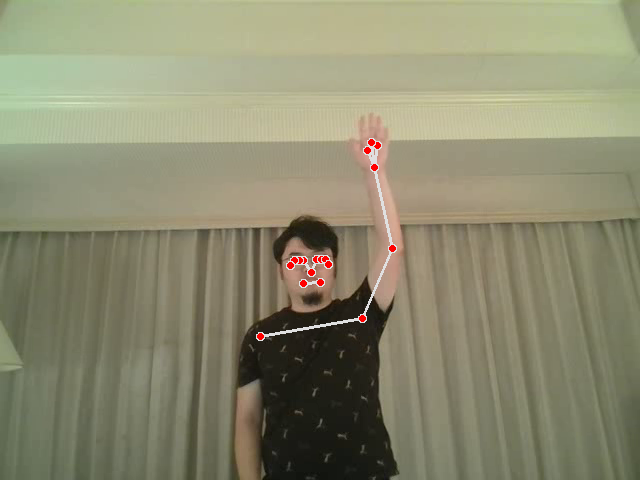

x: 0.581015944480896
y: 0.296035498380661
z: -0.28237390518188477
visibility: 0.9676263332366943

x: 0.5666327476501465
y: 0.6638286709785461
z: 0.03319421410560608
visibility: 0.9999113082885742



In [ ]:
img = cv2.imread('data/input/img03_left_up.png')
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils

pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5, model_complexity=2)
results = pose.process(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
estimation_image = img.copy()
mp_drawing.draw_landmarks(estimation_image,results.pose_landmarks,mp_pose.POSE_CONNECTIONS,)
cv2_imshow(estimation_image)

cv2.imwrite("data/output/img03_left_up_pose_estimation.png",estimation_image)

print(results.pose_landmarks.landmark[19])
print(results.pose_landmarks.landmark[11])

## 顔の部位推定AIの中身を知ろう

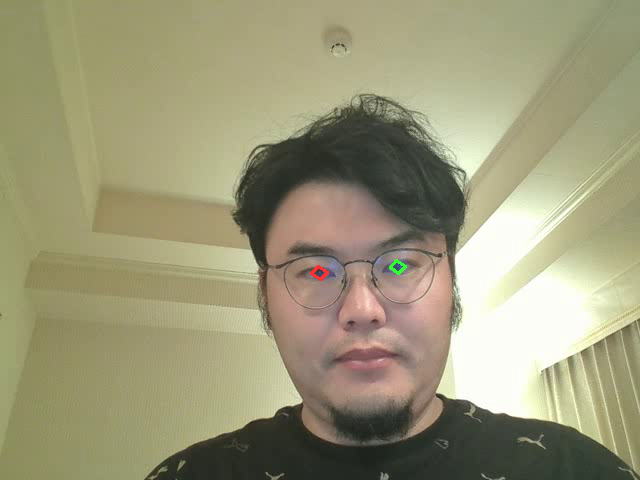

True

In [ ]:
img = cv2.imread('data/input/img04.png')

mp_face_mesh = mp.solutions.face_mesh
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True,max_num_faces=1,refine_landmarks=True, min_detection_confidence=0.5)
results = face_mesh.process(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
estimation_image = img.copy()

for face_landmarks in results.multi_face_landmarks:
  mp_drawing.draw_landmarks(
      image=estimation_image,
      landmark_list=face_landmarks,
      connections=mp_face_mesh.FACEMESH_IRISES,
      landmark_drawing_spec=None,
      connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_iris_connections_style())

cv2_imshow(estimation_image)

cv2.imwrite("data/output/img04_face_mesh.png",estimation_image)

In [ ]:
print(results.multi_face_landmarks[0].landmark[468])
print(results.multi_face_landmarks[0].landmark[33])
print(results.multi_face_landmarks[0].landmark[133])

x: 0.49975138902664185
y: 0.5689145922660828
z: 0.00980292446911335

x: 0.4708541929721832
y: 0.573254406452179
z: 0.020960159599781036

x: 0.5243286490440369
y: 0.5740516781806946
z: 0.010094216093420982



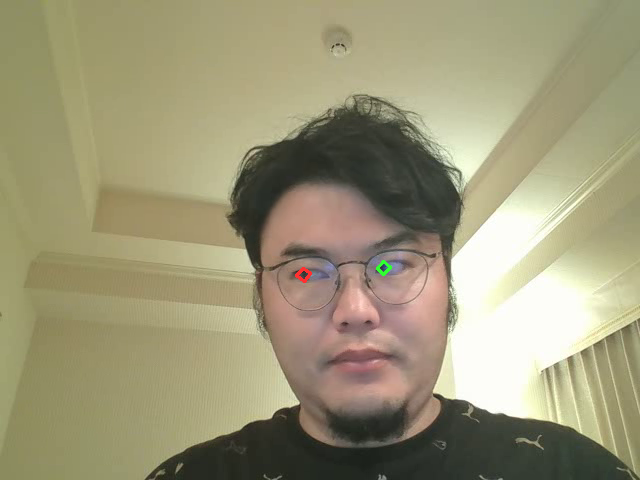

x: 0.4746924936771393
y: 0.5720893144607544
z: 0.011163338087499142

x: 0.45499926805496216
y: 0.5752311944961548
z: 0.02252439223229885

x: 0.5097004771232605
y: 0.5744860768318176
z: 0.011320308782160282



In [ ]:
img = cv2.imread('data/input/img05_eye_right.png')

mp_face_mesh = mp.solutions.face_mesh
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True,max_num_faces=1,refine_landmarks=True, min_detection_confidence=0.5)
results = face_mesh.process(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
estimation_image = img.copy()

for face_landmarks in results.multi_face_landmarks:
  mp_drawing.draw_landmarks(
      image=estimation_image,
      landmark_list=face_landmarks,
      connections=mp_face_mesh.FACEMESH_IRISES,
      landmark_drawing_spec=None,
      connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_iris_connections_style())

cv2_imshow(estimation_image)

cv2.imwrite("data/output/img05_eye_right_face_mesh.png",estimation_image)

print(results.multi_face_landmarks[0].landmark[468])
print(results.multi_face_landmarks[0].landmark[33])
print(results.multi_face_landmarks[0].landmark[133])